In [2]:
library(tidyverse)
library(targets)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
summary_plot_recipe = qs::qread("summary_plot_recipe.qs")

In [4]:
summary_plot_recipe %>% 
filter(str_detect(deg_output_suffix, fixed("MOL___all.obob5v5__v__all.obob14vBL6___fgf1_grouping.pos_vs_neg")))

deg_output_suffix                                              
1 MOL___all.obob5v5__v__all.obob14vBL6___fgf1_grouping.pos_vs_neg
  global_seurat_obj  seurat_obj nhgc_obj                                 
1 exp_labelled_other obj_MOL    nhgc_MOL___all.obob5v5__v__all.obob14vBL6
  deg_ensmus_obj                                                            
1 deg_ensmus_MOL___all.obob5v5__v__all.obob14vBL6___fgf1_grouping.pos_vs_neg
  nhood_grouping name                                                         
1 fgf1_grouping  MOL\nall.obob5v5__v__all.obob14vBL6\nfgf1_grouping.pos_vs_neg
  group_a group_b
1 pos     neg

In [5]:
global_seurat_obj = qs::qread('_targets/objects/exp_labelled_other')

In [6]:
nhgc_obj = qs::qread('_targets/objects/nhgc_MOL___all.obob5v5__v__all.obob14vBL6')

In [7]:
deg_ensmus_obj = qs::qread('_targets/objects/deg_ensmus_MOL___all.obob5v5__v__all.obob14vBL6___fgf1_grouping.pos_vs_neg')

In [8]:
nhood_grouping = 'fgf1_grouping'

In [9]:
name = "all.obob5v5__v__all.obob14vBL6 fgf1_grouping.pos_vs_neg"

In [10]:
packages=c("tidyverse", "ggplot2", "patchwork", "Seurat")
lapply(packages, require, character.only = TRUE)

Loading required package: patchwork

Loading required package: Seurat

Attaching SeuratObject



[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

In [11]:
source('milo.R')
source('milo_plotting.R')

In [12]:
nhgc_coords = make_nhgc_coords(nhgc_obj, global_seurat_obj, nhood_grouping)
kde_df = make_kde_df(nhgc_coords)

In [13]:
nhgc_coords %>% head

rowname              restored_grouping fgf1_grouping labels UMAP_1  
1 TACATTCAGCTATCCA_1_1 none              none          none   12.64351
2 CGCATAAAGAGGTATT_1_1 none              none          none   12.08047
3 GAGGCCTTCTGGGCCA_1_1 none              none          none   11.11787
4 ATGCCTCTCTGCCTCA_1_1 none              none          none   11.70777
5 CAGTTCCTCTCCCATG_1_1 none              none          none   12.45258
6 AGCCACGTCAGAGTTC_1_1 none              none          none   11.29001
  UMAP_2     group_colors
1 -4.1684979 #707070     
2  0.8707824 #707070     
3 -3.8072785 #707070     
4 -3.5479787 #707070     
5 -2.9214767 #707070     
6 -4.2446698 #707070

In [14]:
kde_df %>% head

x        y        z            labels break_min_val contour_colors
1 9.449021 -8.70252 5.614491e-61 none   0.0002177765  #707070       
2 9.504854 -8.70252 5.349012e-60 none   0.0002177765  #707070       
3 9.560686 -8.70252 4.668004e-59 none   0.0002177765  #707070       
4 9.616519 -8.70252 3.732388e-58 none   0.0002177765  #707070       
5 9.672351 -8.70252 2.736008e-57 none   0.0002177765  #707070       
6 9.728183 -8.70252 1.841750e-56 none   0.0002177765  #707070

In [15]:
dgs = make_summary_deg_plot(global_seurat_obj, nhgc_obj, deg_ensmus_obj, nhood_grouping, name)

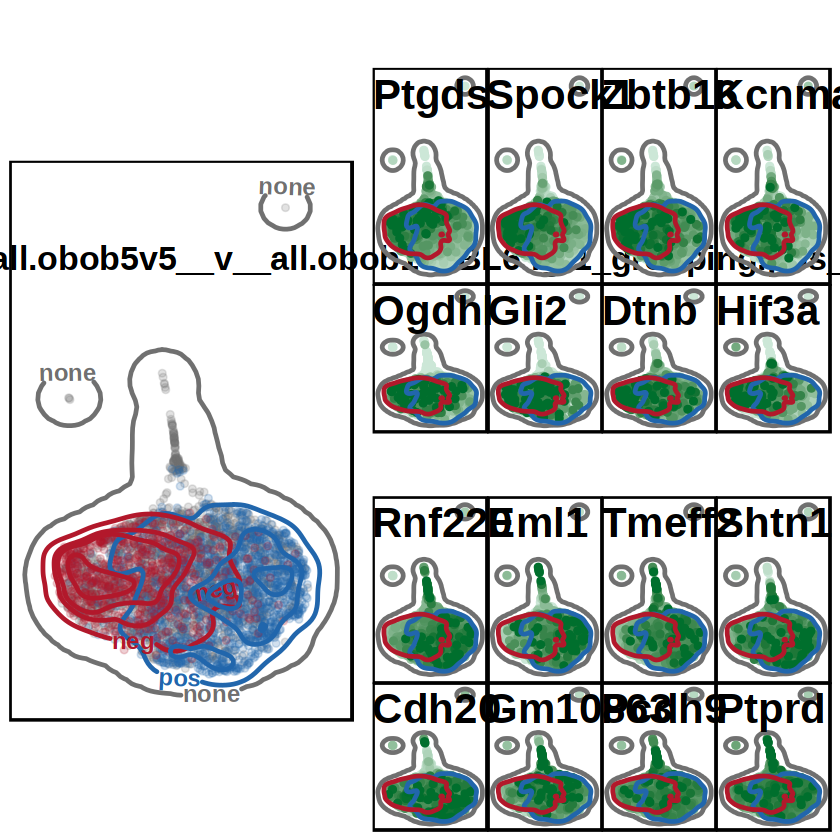

In [16]:
dgs

In [17]:
nhgc_obj %>% head

rowname              restored_grouping fgf1_grouping
1 CACGGGTCACGCACCA_2_1 neg_FGF1          neg          
2 TCTCACGTCTGCTTAT_1_2 pos_away          pos          
3 GATGCTAAGCCAAGCA_3_2 pos_away          pos          
4 CGCCATTGTAACATAG_2_3 pos_away          pos          
5 CCGTTCAAGACTGTTC_1_1 pos_FGF1          pos          
6 AATGGCTTCGACACCG_1_1 pos_FGF1          pos

In [18]:
nhgc_coords = make_nhgc_coords(nhgc_obj, global_seurat_obj, nhood_grouping)
nhgc_coords %>% head

rowname              restored_grouping fgf1_grouping labels UMAP_1  
1 TACATTCAGCTATCCA_1_1 none              none          none   12.64351
2 CGCATAAAGAGGTATT_1_1 none              none          none   12.08047
3 GAGGCCTTCTGGGCCA_1_1 none              none          none   11.11787
4 ATGCCTCTCTGCCTCA_1_1 none              none          none   11.70777
5 CAGTTCCTCTCCCATG_1_1 none              none          none   12.45258
6 AGCCACGTCAGAGTTC_1_1 none              none          none   11.29001
  UMAP_2     group_colors
1 -4.1684979 #707070     
2  0.8707824 #707070     
3 -3.8072785 #707070     
4 -3.5479787 #707070     
5 -2.9214767 #707070     
6 -4.2446698 #707070

In [19]:
nhgc_coords %>% 
group_by(labels) %>%
summarise(umap1_mean = mean(UMAP_1),
          umap2_mean = mean(UMAP_2))

labels umap1_mean umap2_mean
1 none   12.13706   -2.879075 
2 pos    12.78885   -3.468877 
3 neg    11.52028   -3.064751

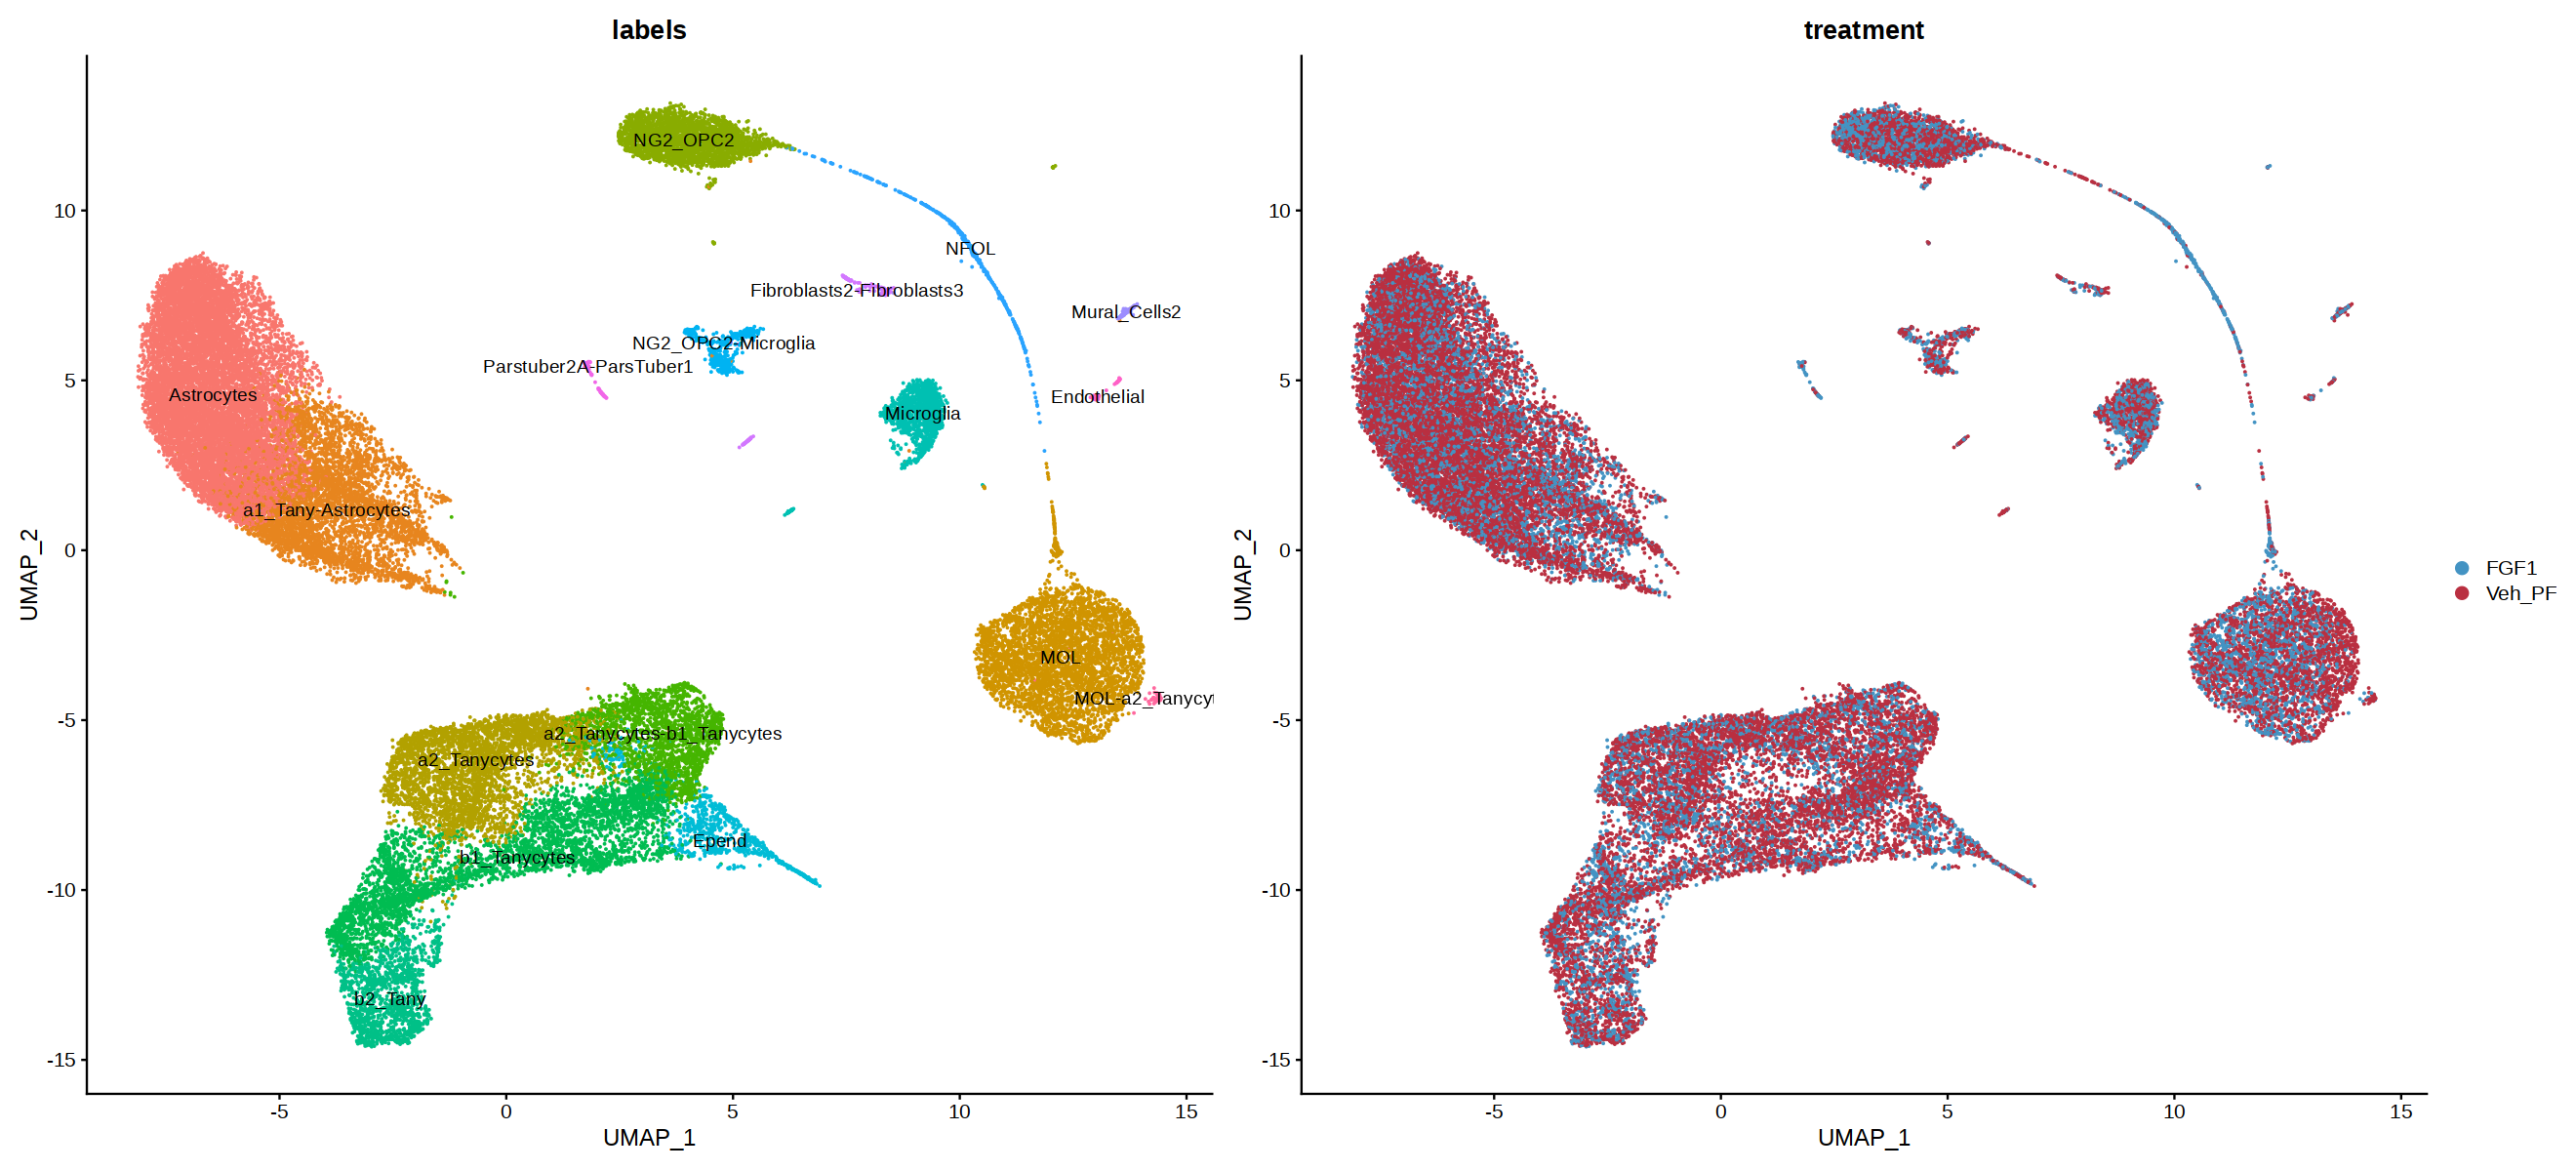

In [20]:
options(repr.plot.width=22, repr.plot.height=10)
p1 = DimPlot(global_seurat_obj, group.by = "labels", label = TRUE) + theme(legend.position="none")
p2 = DimPlot(global_seurat_obj, group.by = "treatment", cols=c("#4393c3", "#b92f40"))
# p2[[1]]$layers[[1]]$aes_params$alpha =  .25 
p1 + p2

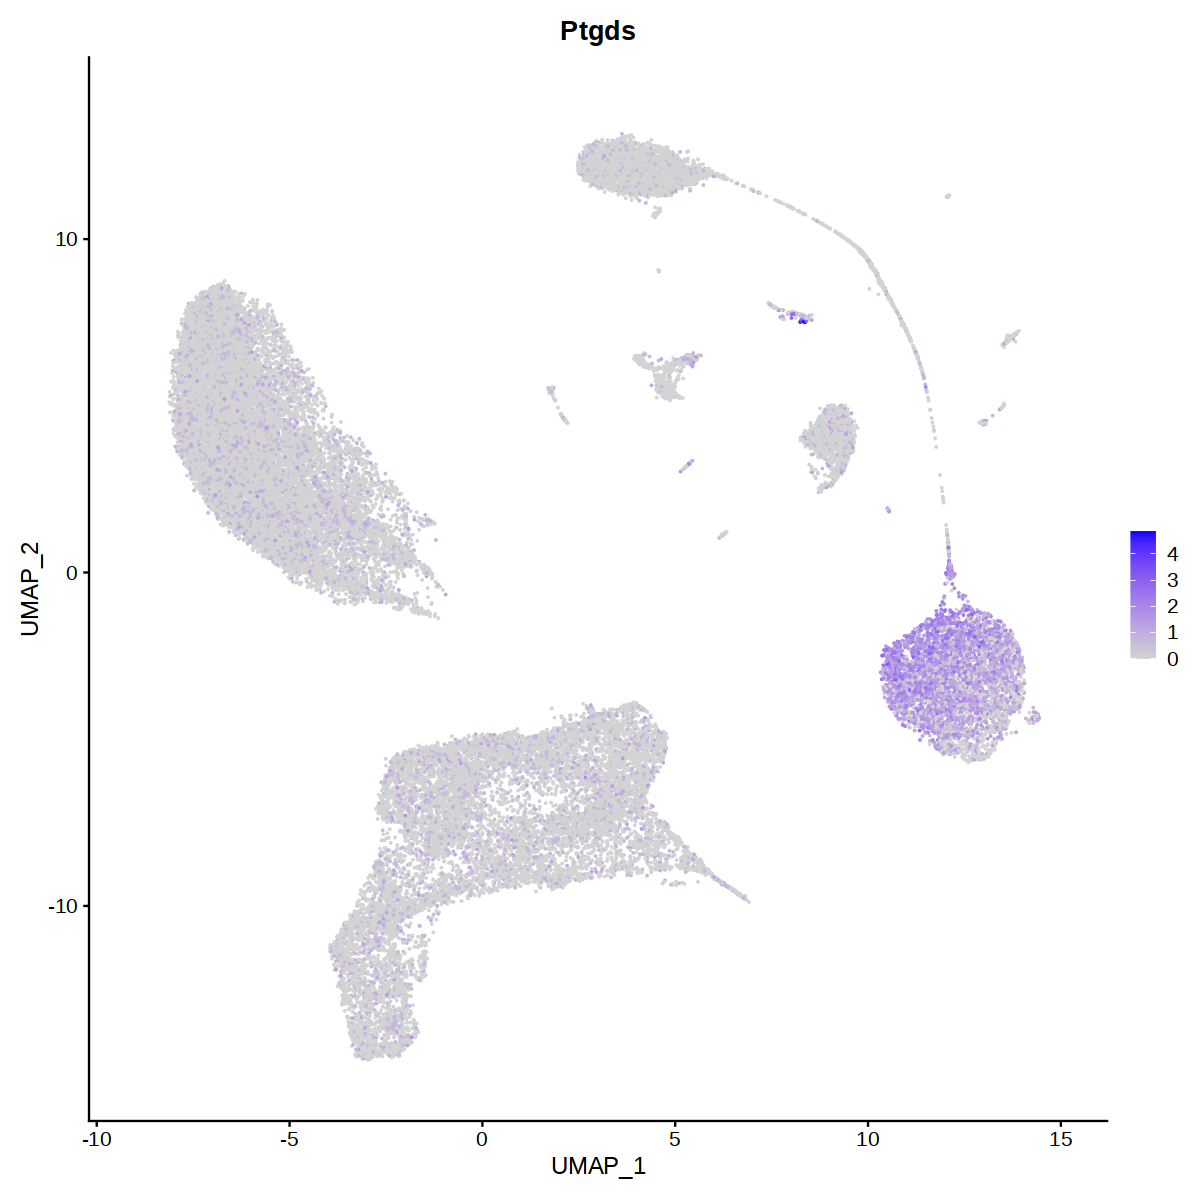

In [21]:
options(repr.plot.width=10, repr.plot.height=10)
p3 = FeaturePlot(global_seurat_obj, "Ptgds")
p3

In [24]:
pldf = qs::qread('_targets/objects/pldf_MOL___obob5v5')
pldf %>% head

polar_label
ATTACTCTCCGCGGAT_1_1 MOL.pos    
AGTTCGAAGAAACCAT_1_1 MOL.pos    
CACGGGTGTTACACTG_1_1 MOL.none   
GCCAACGGTTGTTTGG_1_1 MOL.none   
CGAAGGAAGCACGATG_1_1 MOL.none   
GTAACACCATATGGCT_1_1 MOL.none

In [25]:
umap_coords = global_seurat_obj@reductions$umap@cell.embeddings %>%
    as.data.frame %>%
    rownames_to_column

pldf_coords = pldf %>%
    rownames_to_column %>%
    left_join(umap_coords, by = "rowname")
pldf_coords %>% head

rowname              polar_label UMAP_1   UMAP_2    
1 ATTACTCTCCGCGGAT_1_1 MOL.pos     12.11282  0.1718442
2 AGTTCGAAGAAACCAT_1_1 MOL.pos     12.08546  0.7346616
3 CACGGGTGTTACACTG_1_1 MOL.none    12.24913 -5.5306972
4 GCCAACGGTTGTTTGG_1_1 MOL.none    11.93771 -3.9131666
5 CGAAGGAAGCACGATG_1_1 MOL.none    12.05594  1.1190968
6 GTAACACCATATGGCT_1_1 MOL.none    12.52911 -2.8075429

In [27]:
pldf_coords %>% 
group_by(polar_label) %>%
summarise(umap1_mean = mean(UMAP_1),
          umap2_mean = mean(UMAP_2))

polar_label umap1_mean umap2_mean
1 MOL.neg     11.39849   -3.106834 
2 MOL.none    12.19737   -3.083515 
3 MOL.pos     12.80427   -3.142136

In [53]:
milo = qs::qread('_targets/objects/milo_MOL')
milo

class: Milo 
dim: 17447 4023 
metadata(0):
assays(2): counts logcounts
rownames(17447): Lypla1 Tcea1 ... ENSMUSG00000095742 ENSMUSG00000095041
rowData names(0):
colnames(4023): ATTACTCTCCGCGGAT_1_1 AGTTCGAAGAAACCAT_1_1 ...
  AGGCATTGTCATCGGC_5_3 TGTAGACCAATGAAAC_5_3
colData names(36): orig.ident nCount_RNA ... group ident
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(0):
nhoods dimensions(2): 4023 210
nhoodCounts dimensions(2): 210 36
nhoodDistances dimension(1): 210
graph names(1): graph
nhoodIndex names(1): 210
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 210 210

In [51]:
da_results = qs::qread('_targets/objects/da_results_00_MOL___obob5v5')

In [33]:
library(miloR)
library(SingleCellExperiment)
library(scater)
library(scran)
library(dplyr)
library(patchwork)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, 

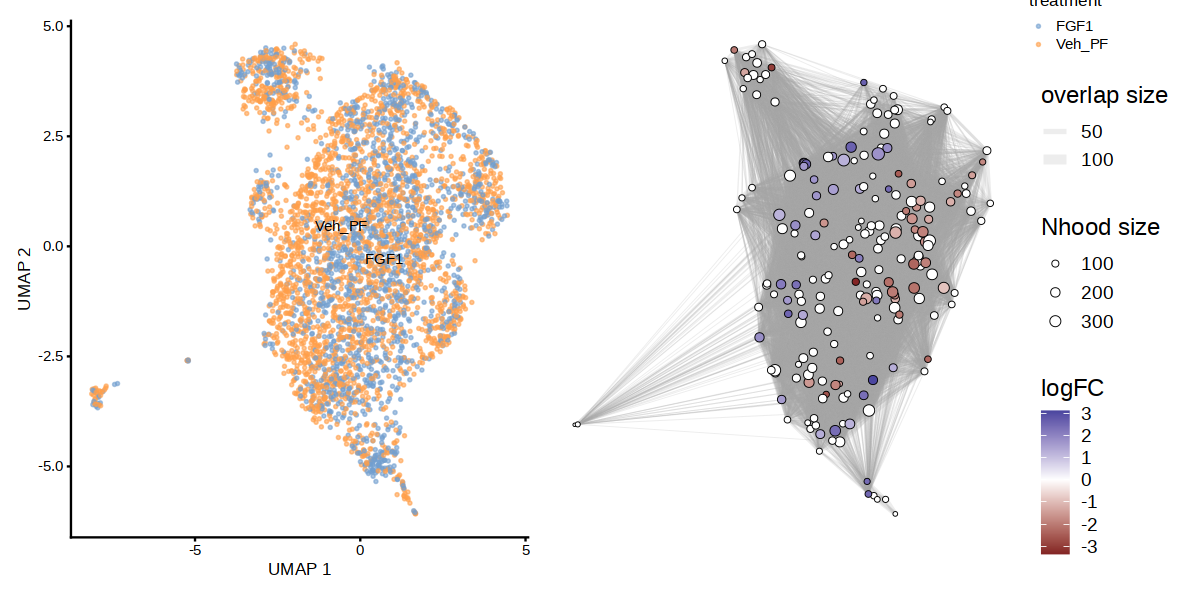

In [60]:
## Plot single-cell UMAP
options(repr.plot.width=10, repr.plot.height=5)
umap_pl <- plotReducedDim(milo, dimred = "UMAP", colour_by="treatment", text_by = "treatment", 
                          text_size = 3, point_size=0.5) +
  guides(fill="none")

## Plot neighbourhood graph
nh_graph_pl <- plotNhoodGraphDA(milo, da_results, layout="UMAP",alpha=0.1) 
  
umap_pl + nh_graph_pl +
  plot_layout(guides="collect")

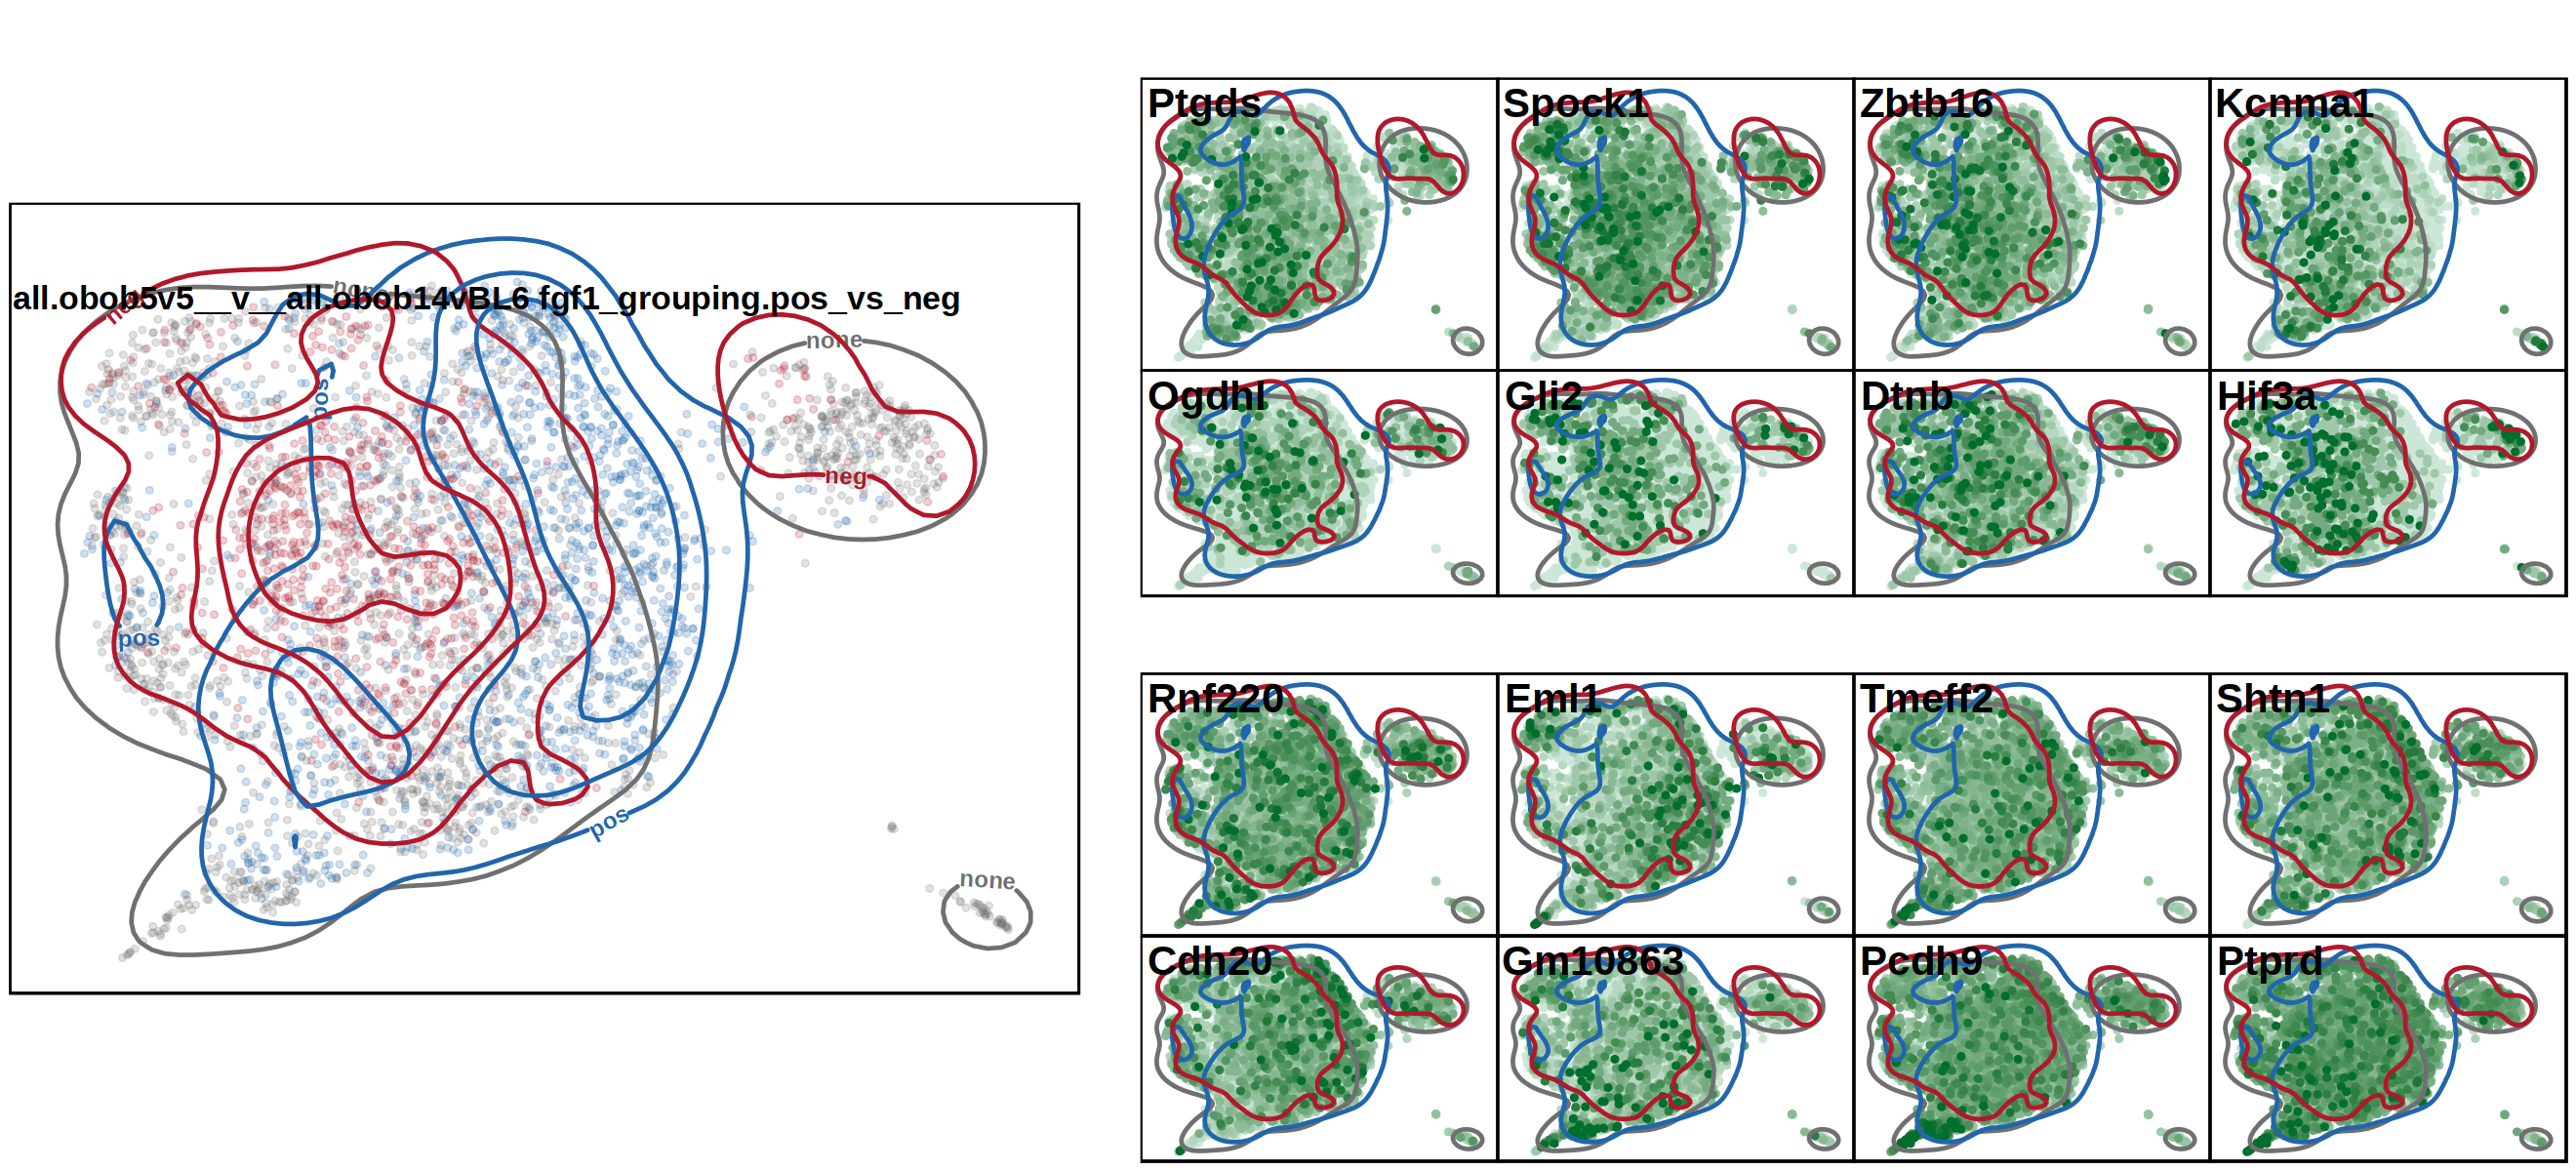

In [41]:
local_seurat_obj = qs::qread('_targets/objects/obj_MOL')
lgs = make_summary_deg_plot(local_seurat_obj, nhgc_obj, deg_ensmus_obj, nhood_grouping, name)
lgs

In [62]:
design_df = qs::qread('_targets/objects/design_df_MOL')
design_df %>% head

hash.mcl.ID group             batch    strain
J11 J11         FGF1.Day14.obob   Batch__1 obob  
M4  M4          Veh_PF.Day5.BL6   Batch__1 BL6   
N8  N8          Veh_PF.Day5.obob  Batch__1 obob  
M24 M24         Veh_PF.Day14.obob Batch__1 obob  
M2  M2          Veh_PF.Day5.BL6   Batch__1 BL6   
M18 M18         Veh_PF.Day14.BL6  Batch__1 BL6

In [65]:
design_df %>% pull(group) %>% levels

[1] "Veh_PF.Day14.BL6"  "Veh_PF.Day5.BL6"   "FGF1.Day14.obob"  
[4] "Veh_PF.Day14.obob" "FGF1.Day5.obob"    "Veh_PF.Day5.obob"

In [63]:
make_model_matrix = function(design_df){
    model <- model.matrix(~0 + group + batch, data=design_df)
    model
}

In [64]:
model_matrix = make_model_matrix(design_df)
model_matrix

groupVeh_PF.Day14.BL6 groupVeh_PF.Day5.BL6 groupFGF1.Day14.obob
J11 0                     0                    1                   
M4  0                     1                    0                   
N8  0                     0                    0                   
M24 0                     0                    0                   
M2  0                     1                    0                   
M18 1                     0                    0                   
N7  0                     0                    0                   
J2  0                     0                    0                   
M8  0                     0                    0                   
M17 1                     0                    0                   
M9  0                     0                    0                   
M13 0                     0                    1                   
M25 0                     0                    0                   
M29 0                     0                    0                   
M27 0                     0                    1                   
M5  0                     1                    0                   
J16 0                     0                    1                   
M19 1                     0                    0                   
N17 0                     0                    0                   
M23 0                     0                    1                   
N12 0                     0                    0                   
M10 0                     0                    0                   
J7  0                     0                    0                   
M11 0                     0                    0                   
N26 0                     0                    0                   
J18 0                     0                    1                   
M6  0                     1                    0                   
M28 0                     0                    1                   
M14 0                     0                    0                   
M30 0                     0                    0                   
J10 0                     0                    0                   
M15 0                     0                    0                   
N21 0                     0                    0                   
M20 1                     0                    0                   
N23 0                     0                    0                   
N13 0                     0                    0                   
    groupVeh_PF.Day14.obob groupFGF1.Day5.obob groupVeh_PF.Day5.obob
J11 0                      0                   0                    
M4  0                      0                   0                    
N8  0                      0                   1                    
M24 1                      0                   0                    
M2  0                      0                   0                    
M18 0                      0                   0                    
N7  0                      1                   0                    
J2  1                      0                   0                    
M8  0                      0                   1                    
M17 0                      0                   0                    
M9  0                      1                   0                    
M13 0                      0                   0                    
M25 1                      0                   0                    
M29 1                      0                   0                    
M27 0                      0                   0                    
M5  0                      0                   0                    
J16 0                      0                   0                    
M19 0                      0                   0                    
N17 0                      1                   0                    
M23 0                      0                   0                    
N12 0                      0           

In [59]:
model_matrix %>% colnames %>% dput

c("groupVeh_PF.Day14.BL6", "groupVeh_PF.Day5.BL6", "groupFGF1.Day14.obob", 
"groupVeh_PF.Day14.obob", "groupFGF1.Day5.obob", "groupVeh_PF.Day5.obob", 
"batchBatch__2", "batchBatch__3")


In [48]:
mod.constrast <- makeContrasts(contrasts="groupFGF1.Day5.obob - groupVeh_PF.Day5.obob", levels=model_matrix)
mod.constrast

Contrasts
Levels                   groupFGF1.Day5.obob - groupVeh_PF.Day5.obob
  groupVeh_PF.Day14.BL6   0                                         
  groupVeh_PF.Day5.BL6    0                                         
  groupFGF1.Day14.obob    0                                         
  groupVeh_PF.Day14.obob  0                                         
  groupFGF1.Day5.obob     1                                         
  groupVeh_PF.Day5.obob  -1                                         
  batchBatch__2           0                                         
  batchBatch__3           0

In [71]:
degs = qs::qread('_targets/objects/deg_ensmus_MOL___all.obob5v5__v__all.obob14vBL6___fgf1_grouping.pos_vs_neg')
degs %>% head

GeneID  p_val        avg_log2FC pct.1 pct.2 p_val_adj   
1 Rnf220  4.142888e-37 0.5387412  0.978 0.942 7.228096e-33
2 Tmeff2  1.731051e-39 0.4287188  1.000 1.000 3.020164e-35
3 Shtn1   1.614820e-30 0.4519629  0.924 0.823 2.817377e-26
4 Gm10863 1.811690e-25 0.5477126  0.618 0.417 3.160856e-21
5 Dcc     1.762108e-19 0.6867624  0.755 0.644 3.074350e-15
6 Pcdh9   2.388489e-35 0.3133543  1.000 1.000 4.167197e-31
  tag                                                            
1 MOL___all.obob5v5__v__all.obob14vBL6___fgf1_grouping.pos_vs_neg
2 MOL___all.obob5v5__v__all.obob14vBL6___fgf1_grouping.pos_vs_neg
3 MOL___all.obob5v5__v__all.obob14vBL6___fgf1_grouping.pos_vs_neg
4 MOL___all.obob5v5__v__all.obob14vBL6___fgf1_grouping.pos_vs_neg
5 MOL___all.obob5v5__v__all.obob14vBL6___fgf1_grouping.pos_vs_neg
6 MOL___all.obob5v5__v__all.obob14vBL6___fgf1_grouping.pos_vs_neg
  ensmusg            gsea_sort_score
1 ENSMUSG00000028677 17.315667      
2 ENSMUSG00000026109 14.799359      
3 ENSMUSG00000041362 11.547723      
4 ENSMUSG00000075555 11.228216      
5 ENSMUSG00000060534  9.966465      
6 ENSMUSG00000055421  9.519753

In [79]:
degs %>% 
arrange(desc(gsea_sort_score)) %>%
filter(p_val_adj < 0.05) %>%
filter(avg_log2FC > 0) %>%
pull(GeneID) %>%
cat(paste(collapse = " "))

Rnf220 Tmeff2 Shtn1 Gm10863 Dcc Pcdh9 Ugt8a Erbb4 Cdh20 Ptprd Nkain2 Chsy3 Eml1 Tnik Pde4b Pcdh7 Slc22a23 Cadm2 Lpar1 Specc1 ENSMUSG00000118020 Fam168a Mitf Mdga2 Fbn2 Man1a Ncam2 Cntn1 Ccser1 Csmd2 Grik2 Mob3b Pik3c2b Ephb1 Gas7 Tle1 Cilk1 Enpp2 Nav3 Schip1 Amph Anks1b Epha4 Zdhhc14 Rapgef5 Spock3 Pak5 Lrp1b Tanc2 Ptn Grid2 Fchsd2 Opcml Fam171a1 Negr1 Arhgef28 Zeb2 Usp31 Sh3kbp1 ENSMUSG00000109083 Ninj2 Exoc6b Gab1 Pak3 Adamtsl1 Nbea Sox2ot Pbx3 Bcas1 Abtb2 Gnai1 Zfp608 Gfra1 Ppp3ca Lpcat2 Mboat1 Sgms1 Adam19 Spata13 Cdc42se2 ENSMUSG00000117733 Shroom1 

In [80]:
degs %>% 
arrange(gsea_sort_score) %>%
filter(p_val_adj < 0.05) %>%
filter(avg_log2FC < 0) %>%
pull(GeneID) %>%
cat(paste(collapse = " "))

Ptgds Spock1 Zbtb16 Dtnb Gli2 Kcnma1 Sgk1 Otud7a Ogdhl Elmo1 Hif3a St3gal3 Cdc42bpa Rcan2 St6galnac3 Zfand4 Fkbp5 Pakap Tbc1d5 Adipor2 Slc6a1 Map7d2 Agap1 Plcl1 Hecw2 Mast3 Grm7 Slc25a13 Arrdc2 Klf13 Ikzf2 Oxr1 Gabrr2 Plin4 Mast4 Fmn1 Kcnab1 Psap ENSMUSG00000085816 Itgad Cacna2d3 Itpk1 Pakap.1 Map7 Mrgpra6 Cdh19 Kcna1 Enah Dock9 Kctd16 Rhoj Ptprf Ptpn11 Dgki Garnl3 Pcolce2 Mrgpra1 Snx24 Ddc Clmn Rnpep Ehbp1 Zc3h6 Cadps Itih5 Neat1 Phyhd1 Klf9 Atp11a Mrgpra9 D7Ertd443e Pdgfc Bcat1 Lpgat1 Cdc37l1 Gtdc1 Arhgap21 Rab31 St3gal1 Mrgpra2b Slc7a15 Cerk Nrxn2 Unc5c Acot11 

In [81]:
degs %>% 
arrange(gsea_sort_score) %>%
filter(p_val_adj < 0.05) %>%
filter(avg_log2FC < 0) %>%
pull(GeneID) %>%
writeLines

Ptgds
Spock1
Zbtb16
Dtnb
Gli2
Kcnma1
Sgk1
Otud7a
Ogdhl
Elmo1
Hif3a
St3gal3
Cdc42bpa
Rcan2
St6galnac3
Zfand4
Fkbp5
Pakap
Tbc1d5
Adipor2
Slc6a1
Map7d2
Agap1
Plcl1
Hecw2
Mast3
Grm7
Slc25a13
Arrdc2
Klf13
Ikzf2
Oxr1
Gabrr2
Plin4
Mast4
Fmn1
Kcnab1
Psap
ENSMUSG00000085816
Itgad
Cacna2d3
Itpk1
Pakap.1
Map7
Mrgpra6
Cdh19
Kcna1
Enah
Dock9
Kctd16
Rhoj
Ptprf
Ptpn11
Dgki
Garnl3
Pcolce2
Mrgpra1
Snx24
Ddc
Clmn
Rnpep
Ehbp1
Zc3h6
Cadps
Itih5
Neat1
Phyhd1
Klf9
Atp11a
Mrgpra9
D7Ertd443e
Pdgfc
Bcat1
Lpgat1
Cdc37l1
Gtdc1
Arhgap21
Rab31
St3gal1
Mrgpra2b
Slc7a15
Cerk
Nrxn2
Unc5c
Acot11


In [82]:
degs %>% 
arrange(desc(gsea_sort_score)) %>%
filter(p_val_adj < 0.05) %>%
filter(avg_log2FC > 0) %>%
head(8) %>%
pull(GeneID) %>%
cat(paste(collapse = " "))

Rnf220 Tmeff2 Shtn1 Gm10863 Dcc Pcdh9 Ugt8a Erbb4 

In [83]:
degs %>% 
arrange(gsea_sort_score) %>%
filter(p_val_adj < 0.05) %>%
filter(avg_log2FC < 0) %>%
head(8) %>%
pull(GeneID) %>%
cat(paste(collapse = " "))

Ptgds Spock1 Zbtb16 Dtnb Gli2 Kcnma1 Sgk1 Otud7a 

In [ ]:
degs %>% 
arrange(desc(gsea_sort_score)) %>%
filter(p_val_adj < 0.05) %>%
filter(avg_log2FC > 0) %>%
head(8) %>%
pull(GeneID) %>%
cat(paste(collapse = " "))